In [ ]:
import pandas as pd
import requests
import io
import urllib3

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

url = "https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv"

response = requests.get(url, verify=False)

dataframe = pd.read_csv(io.StringIO(response.text), sep=";")

dataframe.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
dataframe.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

In [11]:
dataframe.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
dataframe.shape

(41188, 21)

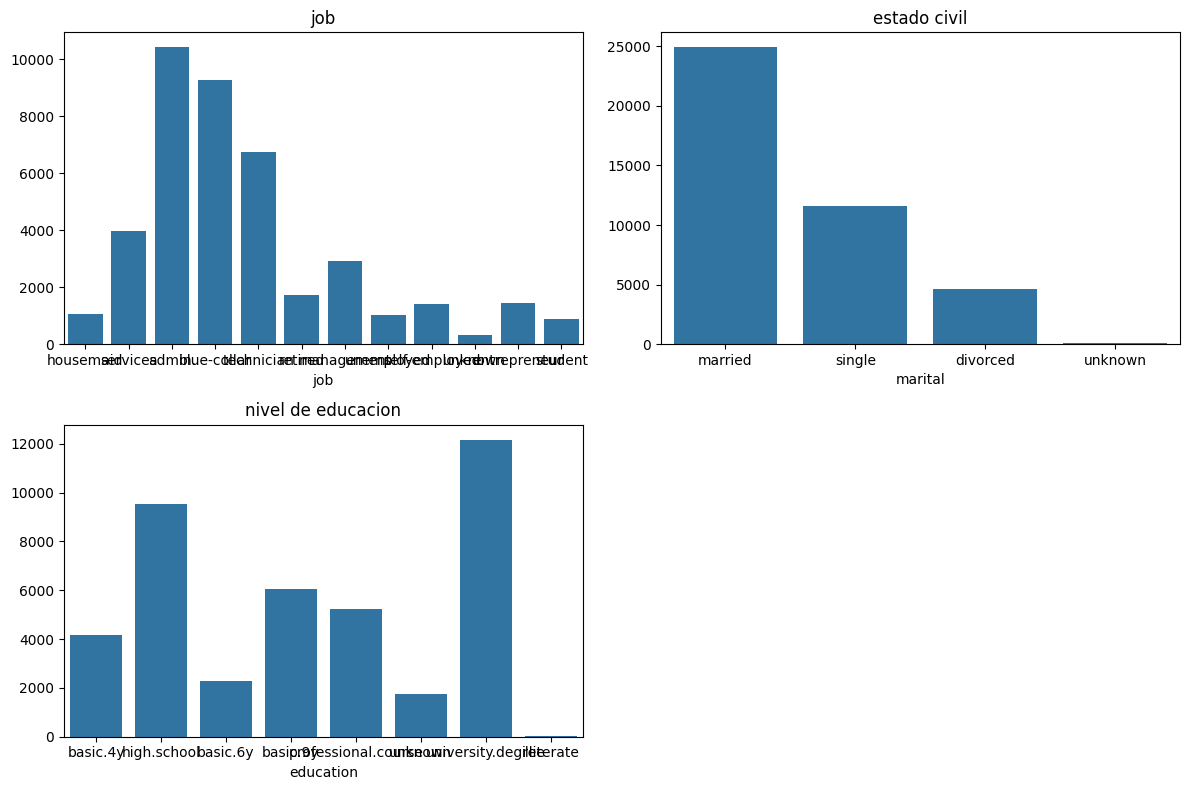

'\nAl ver el histograma, se puede ver que la mayoria del tiempo no es festivo\nPor lo que tambien podemos eliminar esta columna porque no representa mucho\n'

In [15]:
#Analsis univariate variable
#Analisis de variables categoricas, (variable que tiene un limite de numero por categoria)
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(ax=axis[0,0], data=dataframe, x="job").set(ylabel=None)
axis[0,0].set_title("job")

sns.countplot(ax=axis[0,1], data=dataframe, x="marital").set(ylabel=None)
axis[0,1].set_title("estado civil")


sns.countplot(ax=axis[1,0], data=dataframe, x="education").set(ylabel=None)
axis[1,0].set_title("nivel de educacion")

for ax in axis.flat[3:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()
"""
Al ver el histograma, se puede ver que la mayoria del tiempo no es festivo
Por lo que tambien podemos eliminar esta columna porque no representa mucho
"""


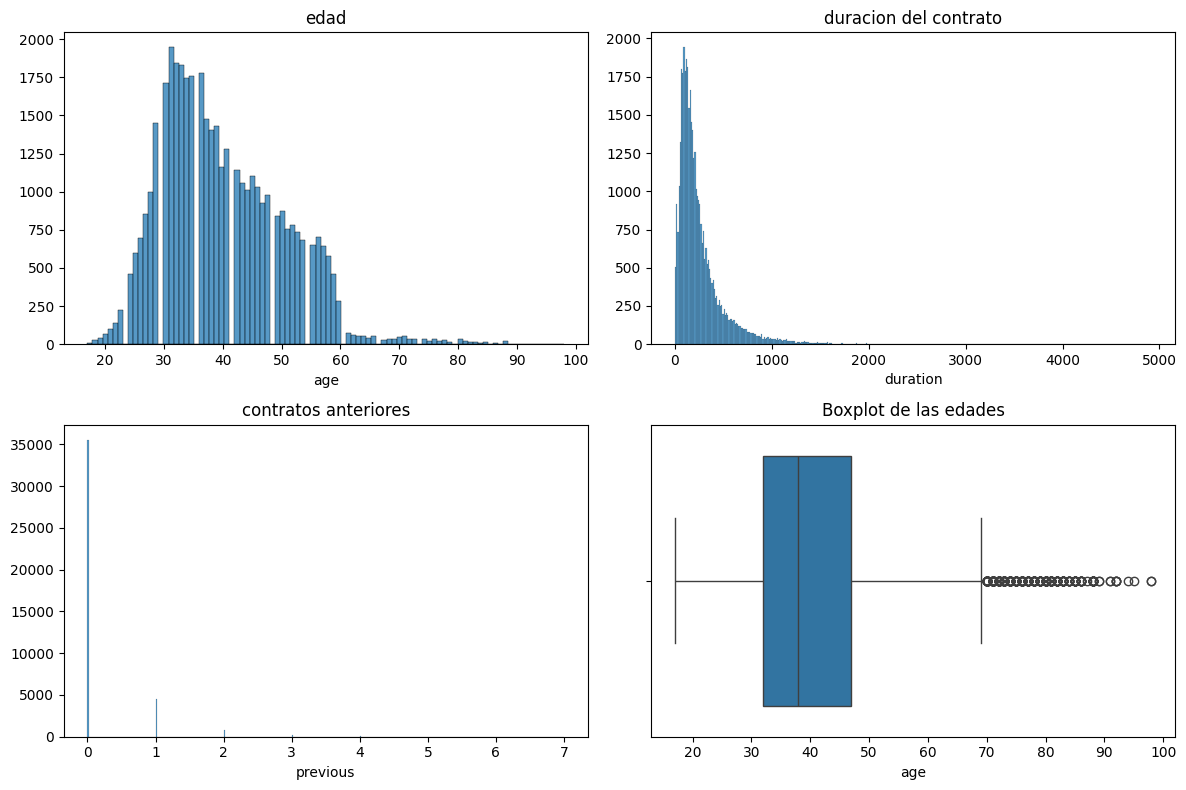

'\n\nExplicacion: Las ventas se ven en una distribucion sesgada a la derecha\npor lo que se estaria hablando de una distribucion asimetrica positiva\nel Skwe >0, el mismo caso se ve para las ventas brutas.\nMismo caso con el costo de ventas. El Inventario total tiene ciertos\noutliner, de casi 80000\n\n'

In [17]:
#Analsis de variables numericas
"""
En este caso tenemos las ventas, el costo, el inventario, etc

"""
import matplotlib.pyplot as plt
import seaborn as sns

#Crear histogramas y un diagrama de caja
fig, axis = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(ax=axis[0,0], data=dataframe, x="age").set(ylabel=None)
axis[0,0].set_title("edad")

sns.histplot(ax=axis[0,1], data=dataframe, x="duration").set(ylabel=None)
axis[0,1].set_title("duracion del contrato")

sns.histplot(ax=axis[1,0], data=dataframe, x="previous").set(ylabel=None)
axis[1,0].set_title("contratos anteriores")


sns.boxplot(ax=axis[1,1], data= dataframe, x="age")
axis[1,1].set_title("Boxplot de las edades")


plt.tight_layout()
plt.show()

dataframe['age'].skew()

"""

Explicacion: Las ventas se ven en una distribucion sesgada a la derecha
por lo que se estaria hablando de una distribucion asimetrica positiva
el Skwe >0, el mismo caso se ve para las ventas brutas.
Mismo caso con el costo de ventas. El Inventario total tiene ciertos
outliner, de casi 80000

"""

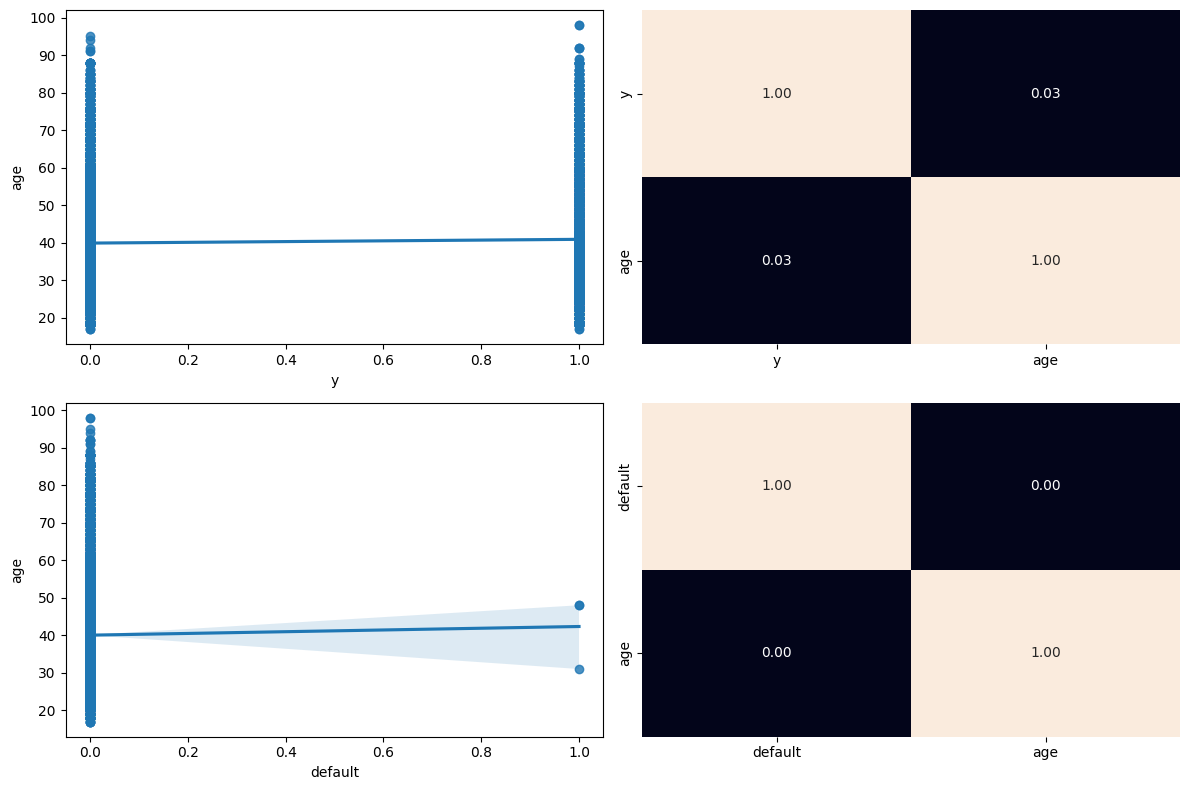

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supongamos que 'y' y 'default' son categóricas (ej. 'yes'/'no')
# Creamos una copia para no alterar el dataframe original si no quieres
df_plot = dataframe.copy()

# Convertimos a numérico (0 y 1)
# Esto asigna 1 si es 'yes' (o el valor positivo que tengas) y 0 si no
if df_plot["y"].dtype == 'object':
    df_plot["y"] = df_plot["y"].apply(lambda x: 1 if x == "yes" else 0)

if df_plot["default"].dtype == 'object':
    df_plot["default"] = df_plot["default"].apply(lambda x: 1 if x == "yes" else 0)

# Ahora ejecutamos tu código de gráficas usando df_plot
fig, axis = plt.subplots(2, 2, figsize=(12, 8))

# Regplot ahora funcionará porque recibe 0s y 1s
sns.regplot(ax=axis[0,0], data=df_plot, x="y", y="age")

sns.heatmap(df_plot[["y","age"]].corr(), annot=True, fmt=".2f",
            ax=axis[0,1], cbar=False)

sns.regplot(ax=axis[1,0], data=df_plot, x="default", y="age")

sns.heatmap(df_plot[["default","age"]].corr(), annot=True, fmt=".2f",
            ax=axis[1,1], cbar=False)

plt.tight_layout()
plt.show()

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd
import requests
import io
import urllib3

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

url = "https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv"

response = requests.get(url, verify=False)

dataframe = pd.read_csv(io.StringIO(response.text), sep=";")

X = dataframe.drop("y", axis=1)
y = dataframe["y"].apply(lambda x: 1 if x == "yes" else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)

param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6283 1027]
 [  82  846]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      7310
           1       0.45      0.91      0.60       928

    accuracy                           0.87      8238
   macro avg       0.72      0.89      0.76      8238
weighted avg       0.93      0.87      0.88      8238

